## Predicting how Congress will vote based on individual member metrics

## Importing Modules

In [26]:
#Required Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA

%matplotlib inline

# Optional Imports
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import AlphaSelection

pd.set_option('display.max_columns', None)

## Preprocessing Data

Reading in the dataset and dropping null values

In [27]:
url = '../datasets/congress_voting.csv'

df = pd.read_csv(url)
dataset = df

vals = 'incumbent,primary_percent,primary_margin,general_percent,general_margin,presidential_vote,presidential_margin,tenure_at_beginning_of_term,party,hr,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,appropriations,smallbusiness,budget,armedservices,foreignaffairs,oversightandgovernmentreform,naturalresources,educationandtheworkforce,rules,intelligence,houseadministration,transportationandinfrastructure,judiciary,energyandcommerce,homelandsecurity,veteransaffairs,financialservices,waysandmeans,sciencespaceandtechnology,agriculture,dwnom1,dwnom2,ideo5,un'.split(',')

dataset = dataset.dropna()

In [28]:
dataset.head()

,incumbent,primary_percent,primary_margin,general_percent,general_margin,presidential_vote,presidential_margin,tenure_at_beginning_of_term,party,name,vote,hr,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40,t41,t42,t43,t44,t45,t46,t47,t48,t49,appropriations,smallbusiness,budget,armedservices,foreignaffairs,oversightandgovernmentreform,naturalresources,educationandtheworkforce,rules,intelligence,houseadministration,transportationandinfrastructure,judiciary,energyandcommerce,homelandsecurity,veteransaffairs,financialservices,waysandmeans,sciencespaceandtechnology,agriculture,dwnom1,dwnom2,ideo5,un
0,1,0.5555,0.3125,0.9786,0.9786,0.62,0.25,10,200,BONNER,0,2431,0.000605,0.000517,0.000865,0.018599,0.000096,0.000177,0.001404,0.000167,0.000410,0.009393,0.000526,0.006951,0.000371,0.002183,0.001425,0.000983,0.000940,0.074574,0.000051,0.001291,0.000307,0.000205,0.093464,0.000247,0.001116,0.000202,0.005722,0.000356,0.000111,0.000347,0.002001,0.003171,0.202152,0.001792,0.001144,0.000111,0.001057,0.000326,0.000847,0.004724,0.000811,0.001293,0.000573,0.487665,0.001539,0.002434,0.000174,0.062734,0.001586,0.000264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.395,0.316,3.445694,0.167937
1,0,0.3457,0.1162,0.7066,0.4132,0.62,0.25,2,200,BYRNE,1,2,0.007106,0.000231,0.031518,0.035005,0.000236,0.000998,0.009066,0.000071,0.000583,0.005540,0.001740,0.058046,0.000031,0.010247,0.009858,0.000219,0.010823,0.000347,0.000054,0.015451,0.000114,0.000549,0.015804,0.002892,0.008654,0.000106,0.000700,0.000663,0.000662,0.006280,0.492909,0.009071,0.064932,0.069114,0.001223,0.000090,0.000159,0.018150,0.000101,0.011570,0.010648,0.000153,0.001062,0.024388,0.001957,0.000161,0.000109,0.060005,0.000235,0.000369,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0.581,0.398,3.445694,0.099071
2,0,0.3457,0.1162,0.7066,0.4132,0.62,0.25,2,200,BYRNE,1,3370,0.000053,0.000040,0.000667,0.000444,0.000236,0.000056,0.000379,0.000045,0.000027,0.053618,0.000041,0.015529,0.000150,0.002914,0.001038,0.000255,0.011542,0.002439,0.000033,0.000313,0.000051,0.000524,0.042709,0.000011,0.028365,0.000067,0.001125,0.000052,0.000270,0.000311,0.000281,0.000204,0.026449,0.000262,0.000219,0.025203,0.685068,0.000862,0.000120,0.001827,0.000027,0.000116,0.037784,0.011572,0.000567,0.000487,0.000031,0.044930,0.000237,0.000450,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0.581,0.398,3.445694,0.176513
3,1,0.5555,0.3125,0.9786,0.9786,0.62,0.25,10,200,BONNER,0,1228,0.000352,0.000091,0.001500,0.001405,0.002323,0.000290,0.002669,0.000075,0.000108,0.006276,0.000124,0.002419,0.003429,0.001506,0.000450,0.000465,0.000714,0.761035,0.000456,0.000178,0.000787,0.000443,0.001640,0.000765,0.001442,0.002357,0.000281,0.000352,0.005127,0.001502,0.000634,0.001738,0.000597,0.000786,0.001425,0.000704,0.001214,0.002248,0.001117,0.000273,0.000038,0.007270,0.001409,0.000152,0.000961,0.122505,0.000206,0.004331,0.001047,0.050786,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.395,0.316,3.445694,0.117402
4,1,0.5555,0.3125,0.9786,0.9786,0.62,0.25,10,200,BONNER,0,3527,0.001043,0.128625,0.000886,0.000631,0.000311,0.000625,0.000967,0.001666,0.000195,0.208586,0.113450,0.004972,0.001461,0.005446,0.004794,0.000888,0.001232,0.103120,0.000863,0.001252,0.000854,0.008577,0.079291,0.000468,0.000440,0.010295,0.022690,0.000380,0.000541,0.001898,0.000554,0.000733,0.002572,0.001769,0.002459,0.000086,0.000921,0.001596,0.000572,0.091209,0.001453,0.000650,0.000364,0.060876,0.007453,0.004031,0.002640,0.109871,0.003571,0.000173,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.395,0.316,3.445694,0.148909


Normalizing dataset and splitting into test and training sets

In [29]:
#predictors
X = dataset[vals]
Xs = X.values

#target variable
y = dataset['vote']
ys = y.values

#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=0)

scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Principal Component Analysis

Running PCA with all components to determine a variance threshold

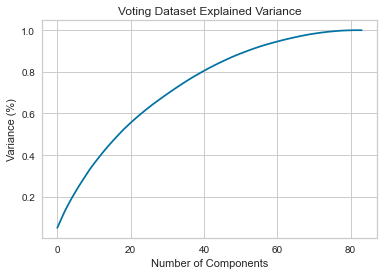

In [30]:
pca = PCA(84)
X_train = pcaf.fit_transform(X_train)
X_test = pca.transform(X_test)

#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_train)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Voting Dataset Explained Variance')
plt.show()

Running a PCA and selecting for features which explain with more than 90% of explained variance

In [31]:
variance_threshold = .9
pca = PCA(variance_threshold)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Random Forest and Model Accuracy on Test

In [32]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf = rf.fit(X_train, y_train)

In [33]:
# check out accuracy 
print("Random Forest OOB Score: "+str(rf.oob_score_))
y_pred = rf.predict(X_test)
print("Random Forest Accuracy on Test Set: ", metrics.accuracy_score(y_test, y_pred, normalize = True))

Random Forest OOB Score: 0.8744534058886405
Random Forest Accuracy on Test Set:  0.8835989117761368


## Feature Importances from Random Forest

In [34]:
#Printing Feature Importances

print("Random Forest Feature Importances - Scaled")
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
importances = []
names = []
for i in range(len(feature_importances)):
    names.append(feature_importances[i][0])
    importances.append(feature_importances[i][1])
rounded = [np.round(x*100/importances[0], 0) for x in importances]


tabled = pd.DataFrame() 
tabled['Variable'] = names
tabled['Importance'] = importances
tabled['Scaled as Percent'] = rounded

tabled.head(15)

Random Forest Feature Importances - Scaled


,Variable,Importance,Scaled as Percent
0,incumbent,0.08,100.0
1,t2,0.04,50.0
2,primary_percent,0.03,38.0
3,general_margin,0.03,38.0
4,presidential_vote,0.03,38.0
5,party,0.03,38.0
6,t0,0.03,38.0
7,primary_margin,0.02,25.0
8,general_percent,0.02,25.0
9,presidential_margin,0.02,25.0


## Other Models: Bagging, Decision Tree, Polynomial

#### Bagging Model

In [35]:
bag = BaggingClassifier(n_estimators=10)
bag = bag.fit(X_train, y_train)

In [36]:
# check out accuracy 
y_pred = bag.predict(X_test)
print("Bagging Accuracy on Test Set: ", metrics.accuracy_score(y_test, y_pred, normalize = True))

Bagging Accuracy on Test Set:  0.8707734162456277


#### Decision Tree

In [37]:
dTree = tree.DecisionTreeClassifier()
dTree = dTree.fit(X_train, y_train)

In [38]:
# check out accuracy 
y_pred = dTree.predict(X_test)
print("Decision Tree Accuracy on Test Set: ", metrics.accuracy_score(y_test, y_pred, normalize = True))

Decision Tree Accuracy on Test Set:  0.7837155071900506


#### Regularization and K-Fold Cross Validation

In [39]:
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=5, copy_X=True, verbose=0, n_jobs=None)
ElasticModel.fit(X_train, y_train)

ElasticNetCV(cv=5)

In [40]:
y_pred = ElasticModel.predict(X_test)
# check out accuracy 
print("Polynomial Regression Accuracy on Test Set: ", r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Polynomial Regression Accuracy on Test Set:  0.16138587335381982
Mean Squared Error: 4.774129930364882
Root Mean Squared Error: 2.184978244826452
